In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject


In [76]:
data=pd.read_csv("income.csv")
data.head()

,name,age,income
0,zafeer,39,140000
1,khan,43,159000
2,faiz,33,75000
3,nazeer,43,50000
4,ahamad,50,70000


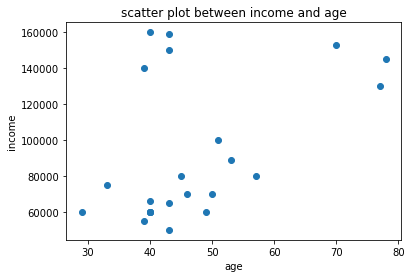

In [77]:
plt.scatter(data["age"],data["income"])
plt.xlabel("age")
plt.ylabel("income")
plt.title("scatter plot between income and age")
plt.show()

here we clearly see that three clusters exists now we can use n_cluster =3

In [78]:
km=KMeans(n_clusters=3)
km.fit(data.drop("name",axis=1))

KMeans(n_clusters=3)

In [79]:
y_predicted=km.predict(data[["age","income"]])
y_predicted

array([2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       1, 2])

In [80]:
data.insert(3,"cluster",y_predicted)

In [81]:
data  # here we see there are three clusters present cluster 0,cluster 1,cluster 2

,name,age,income,cluster
0,zafeer,39,140000,2
1,khan,43,159000,2
2,faiz,33,75000,0
3,nazeer,43,50000,1
4,ahamad,50,70000,1
5,zak,78,145000,2
6,rob,39,55000,1
7,roby,43,65000,1
8,rob1,40,60000,1
9,rob2,57,80000,0


In [82]:
#now we can differenciate all clusters
data_cluster0=data[data["cluster"]==0]
data_cluster1=data[data["cluster"]==1]
data_cluster2=data[data["cluster"]==2]

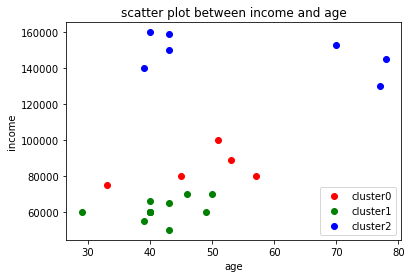

In [83]:
plt.scatter(data_cluster0["age"],data_cluster0["income"],color="red",label="cluster0")
plt.scatter(data_cluster1["age"],data_cluster1["income"],color="green",label="cluster1")
plt.scatter(data_cluster2["age"],data_cluster2["income"],color="blue",label="cluster2")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.title("scatter plot between income and age")
plt.show()

##### here we see cluster 0 are not grouped in best way here problems occurs because of because here we didnot use featere scaling
which is very necessary because income is very big data and age lies between 30 to 80 which is not compatible.so we use here feature scaling.

In [84]:
data=pd.read_csv("income.csv")
data.head()

,name,age,income
0,zafeer,39,140000
1,khan,43,159000
2,faiz,33,75000
3,nazeer,43,50000
4,ahamad,50,70000


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  # minmaxscaler will transform the attribute between [0,1]
data["income"]=scaler.fit_transform(data[["income"]])
data["age"]=scaler.fit_transform(data[["age"]])
data

,name,age,income
0,zafeer,0.204082,0.818182
1,khan,0.285714,0.990909
2,faiz,0.081633,0.227273
3,nazeer,0.285714,0.000000
4,ahamad,0.428571,0.181818
5,zak,1.000000,0.863636
6,rob,0.204082,0.045455
7,roby,0.285714,0.136364
8,rob1,0.224490,0.090909
9,rob2,0.571429,0.272727


In [86]:
km=KMeans(n_clusters=3)
km.fit(data.drop("name",axis=1))
y_predicted=km.predict(data[["age","income"]])
y_predicted

array([1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2])

In [87]:
data.insert(3,"cluster",y_predicted)

In [88]:
data_cluster0=data[data["cluster"]==0]
data_cluster1=data[data["cluster"]==1]
data_cluster2=data[data["cluster"]==2]

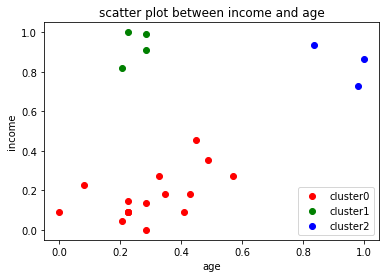

In [89]:
plt.scatter(data_cluster0["age"],data_cluster0["income"],color="red",label="cluster0")
plt.scatter(data_cluster1["age"],data_cluster1["income"],color="green",label="cluster1")
plt.scatter(data_cluster2["age"],data_cluster2["income"],color="blue",label="cluster2")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.title("scatter plot between income and age")
plt.show()

now this is differenciable each one as a cluster
#### to find centeroid  of each cluster we use a method        km.cluster_center_

In [91]:
km.cluster_centers_    #it returns x,y coordinates of centroid for each cluster

array([[0.29411765, 0.1657754 ],
       [0.25      , 0.92954545],
       [0.93877551, 0.84242424]])

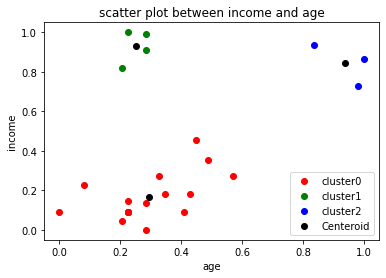

In [92]:
plt.scatter(data_cluster0["age"],data_cluster0["income"],color="red",label="cluster0")
plt.scatter(data_cluster1["age"],data_cluster1["income"],color="green",label="cluster1")
plt.scatter(data_cluster2["age"],data_cluster2["income"],color="blue",label="cluster2")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",label="Centeroid")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.title("scatter plot between income and age")
plt.show()

### Elbow method:- it is use to find out the value of k ,for which k value it will give best model
here we use sumsquareerror sse to find the value of k
#### inertia_ :- it gives the sse

In [97]:
krange=range(1,11)
sse=[]
for i in krange:
    k=KMeans(n_clusters=i)
    k.fit(data[["age","income"]])
    sse.append(k.inertia_)
sse

[4.381905265310712,
 1.4528139955112225,
 0.6265251799826017,
 0.2997830361742557,
 0.21783432695054755,
 0.14763682315564114,
 0.11878141626021305,
 0.0994342749749588,
 0.0809087008053348,
 0.06827923512127065]

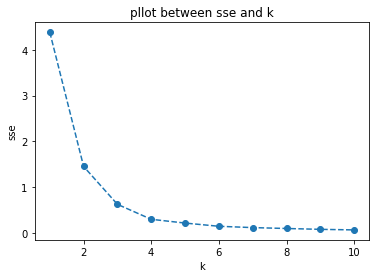

In [111]:
plt.plot(krange,sse,linestyle="dashed")
plt.scatter(krange,sse)
plt.xlabel("k")
plt.ylabel("sse")
plt.title("pllot between sse and k")
plt.show()

In [108]:
##in the above plot we see at k= 4 the  is the value of elbow so if we take 4 cluster the the value accuracy will increases
data=pd.read_csv("income.csv")
scaler=MinMaxScaler()  # minmaxscaler will transform the attribute between [0,1]
data["income"]=scaler.fit_transform(data[["income"]])
data["age"]=scaler.fit_transform(data[["age"]])
km=KMeans(n_clusters=4)
km.fit(data.drop("name",axis=1))
y_predicted=km.predict(data[["age","income"]])
y_predicted

array([1, 1, 3, 3, 0, 2, 3, 3, 3, 0, 1, 0, 0, 3, 1, 3, 3, 0, 3, 2, 3, 0,
       0, 2])

In [109]:
data.insert(3,"cluster",y_predicted)
data_cluster0=data[data["cluster"]==0]
data_cluster1=data[data["cluster"]==1]
data_cluster2=data[data["cluster"]==2]
data_cluster3=data[data["cluster"]==3]

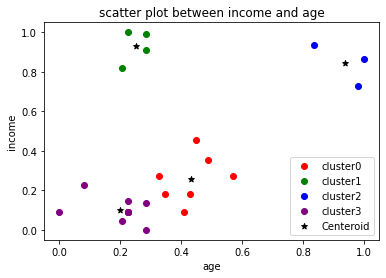

In [110]:
plt.scatter(data_cluster0["age"],data_cluster0["income"],color="red",label="cluster0")
plt.scatter(data_cluster1["age"],data_cluster1["income"],color="green",label="cluster1")
plt.scatter(data_cluster2["age"],data_cluster2["income"],color="blue",label="cluster2")
plt.scatter(data_cluster3["age"],data_cluster3["income"],color="purple",label="cluster3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",label="Centeroid",marker="*")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.title("scatter plot between income and age")
plt.show()